In [ ]:
import pandas as pd
df = pd.read_json("data/project-17.json")

In [28]:
import pandas as pd
df = pd.read_json("data/project-17.json")
df = df[~df.label.isnull()]
df["filename"] = df["image"].apply(lambda x: x.split("/")[-1].split(".")[0])
df["labels_text"] = df["label"].apply(lambda x: ",".join([y for i in x for y in i["rectanglelabels"]]))
df["cnt_label"] = df["labels_text"].apply(lambda x : len(x.split(",")))
df[:3]

,image,id,label,annotator,annotation_id,created_at,updated_at,lead_time,filename,labels_text,cnt_label
0,/data/local-files/?d=ml-prodigy-test/data/imag...,3657,"[{'x': 6.399405414407869, 'y': 56.125229527952...",1,311,2022-07-26 18:54:17.162187+00:00,2022-07-26 18:54:17.162230+00:00,15.606,355403_medicalDocumentatnionFile_1__3_a,Wyniki badań,1
1,/data/local-files/?d=ml-prodigy-test/data/imag...,3656,"[{'x': 35.188866799204774, 'y': 34.35013262599...",1,310,2022-07-26 18:54:00.350836+00:00,2022-07-26 18:54:00.350856+00:00,4.238,355403_medicalDocumentatnionFile_1__2_a,brak etykiet,1
2,/data/local-files/?d=ml-prodigy-test/data/imag...,3655,"[{'x': 37.86525654295881, 'y': 28.741894295535...",1,309,2022-07-26 18:53:55.177890+00:00,2022-07-26 18:53:55.177911+00:00,12.412,355403_medicalDocumentatnionFile_1__1_a,brak etykiet,1


In [29]:
df["labels_text"].str.split(",").explode().value_counts()

błędna cenzura                          75
Rozpoznanie                             56
Tytuł dokumentu                         44
Wyniki badań                            27
brak etykiet                            24
Nazwa placówki                          21
Epikryza                                15
dokument nie medyczny / nie istotny     12
jakość zdjęcia utrunia etykietowanie    12
pismo odręczne                           9
niepełny skan                            5
Pacjent                                  1
Name: labels_text, dtype: int64

In [30]:
label2color = {'Epikryza':'green','Rozpoznanie':'DeepSkyBlue','Tytuł dokumentu':'Olive', 'Wyniki badań ':'Purple',"Nazwa placówki":"DeepPink","Pacjent":"black"}

In [34]:
f1 = df["labels_text"].str.contains("Epikryza")
f2 = df["labels_text"].str.contains("Rozpoznanie")
df[f1 & f2]["filename"].values

array(['355403_medicalDocumentationConfirmingThatWasAtTheICUFile_1__0_a',
       '355380_medicalDocumentatnionFile_1__0_a',
       '355279_medicalDocumentatnionFile_1__0_a',
       '355346_medicalCertificateConfirmingTheCompletionOfTreatmentFile_2__0_a',
       '355343_medicalDocumentatnionFile_1__0_a',
       '355341_medicalDocumentatnionFile_4__0_a',
       '355308_medicalDocumentatnionFile_4__0_a',
       '355294_medicalDocumentatnionFile_1__0_a'], dtype=object)

In [41]:
# convert from LS percent units to pixels 
## https://labelstud.io/guide/export.html#Label-Studio-JSON-format-of-annotated-tasks

def convert_from_ls(result):
    w, h = result['original_width'], result['original_height']

    return  ", ".join(result["rectanglelabels"]), \
            w * result['x'] / 100.0, \
            h * result['y'] / 100.0, \
            w * result['width'] / 100.0, \
            h * result['height'] / 100.0

# label_text, label_x, label_y, label_width, label_height = convert_from_ls(labels_params[0])
# label_text, label_x, label_y, label_width, label_height

(552, 88)


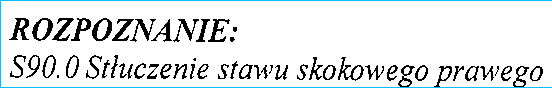

(1195, 180)


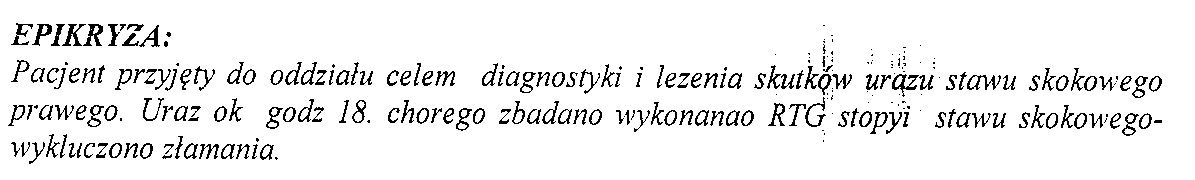

(1500, 2250)


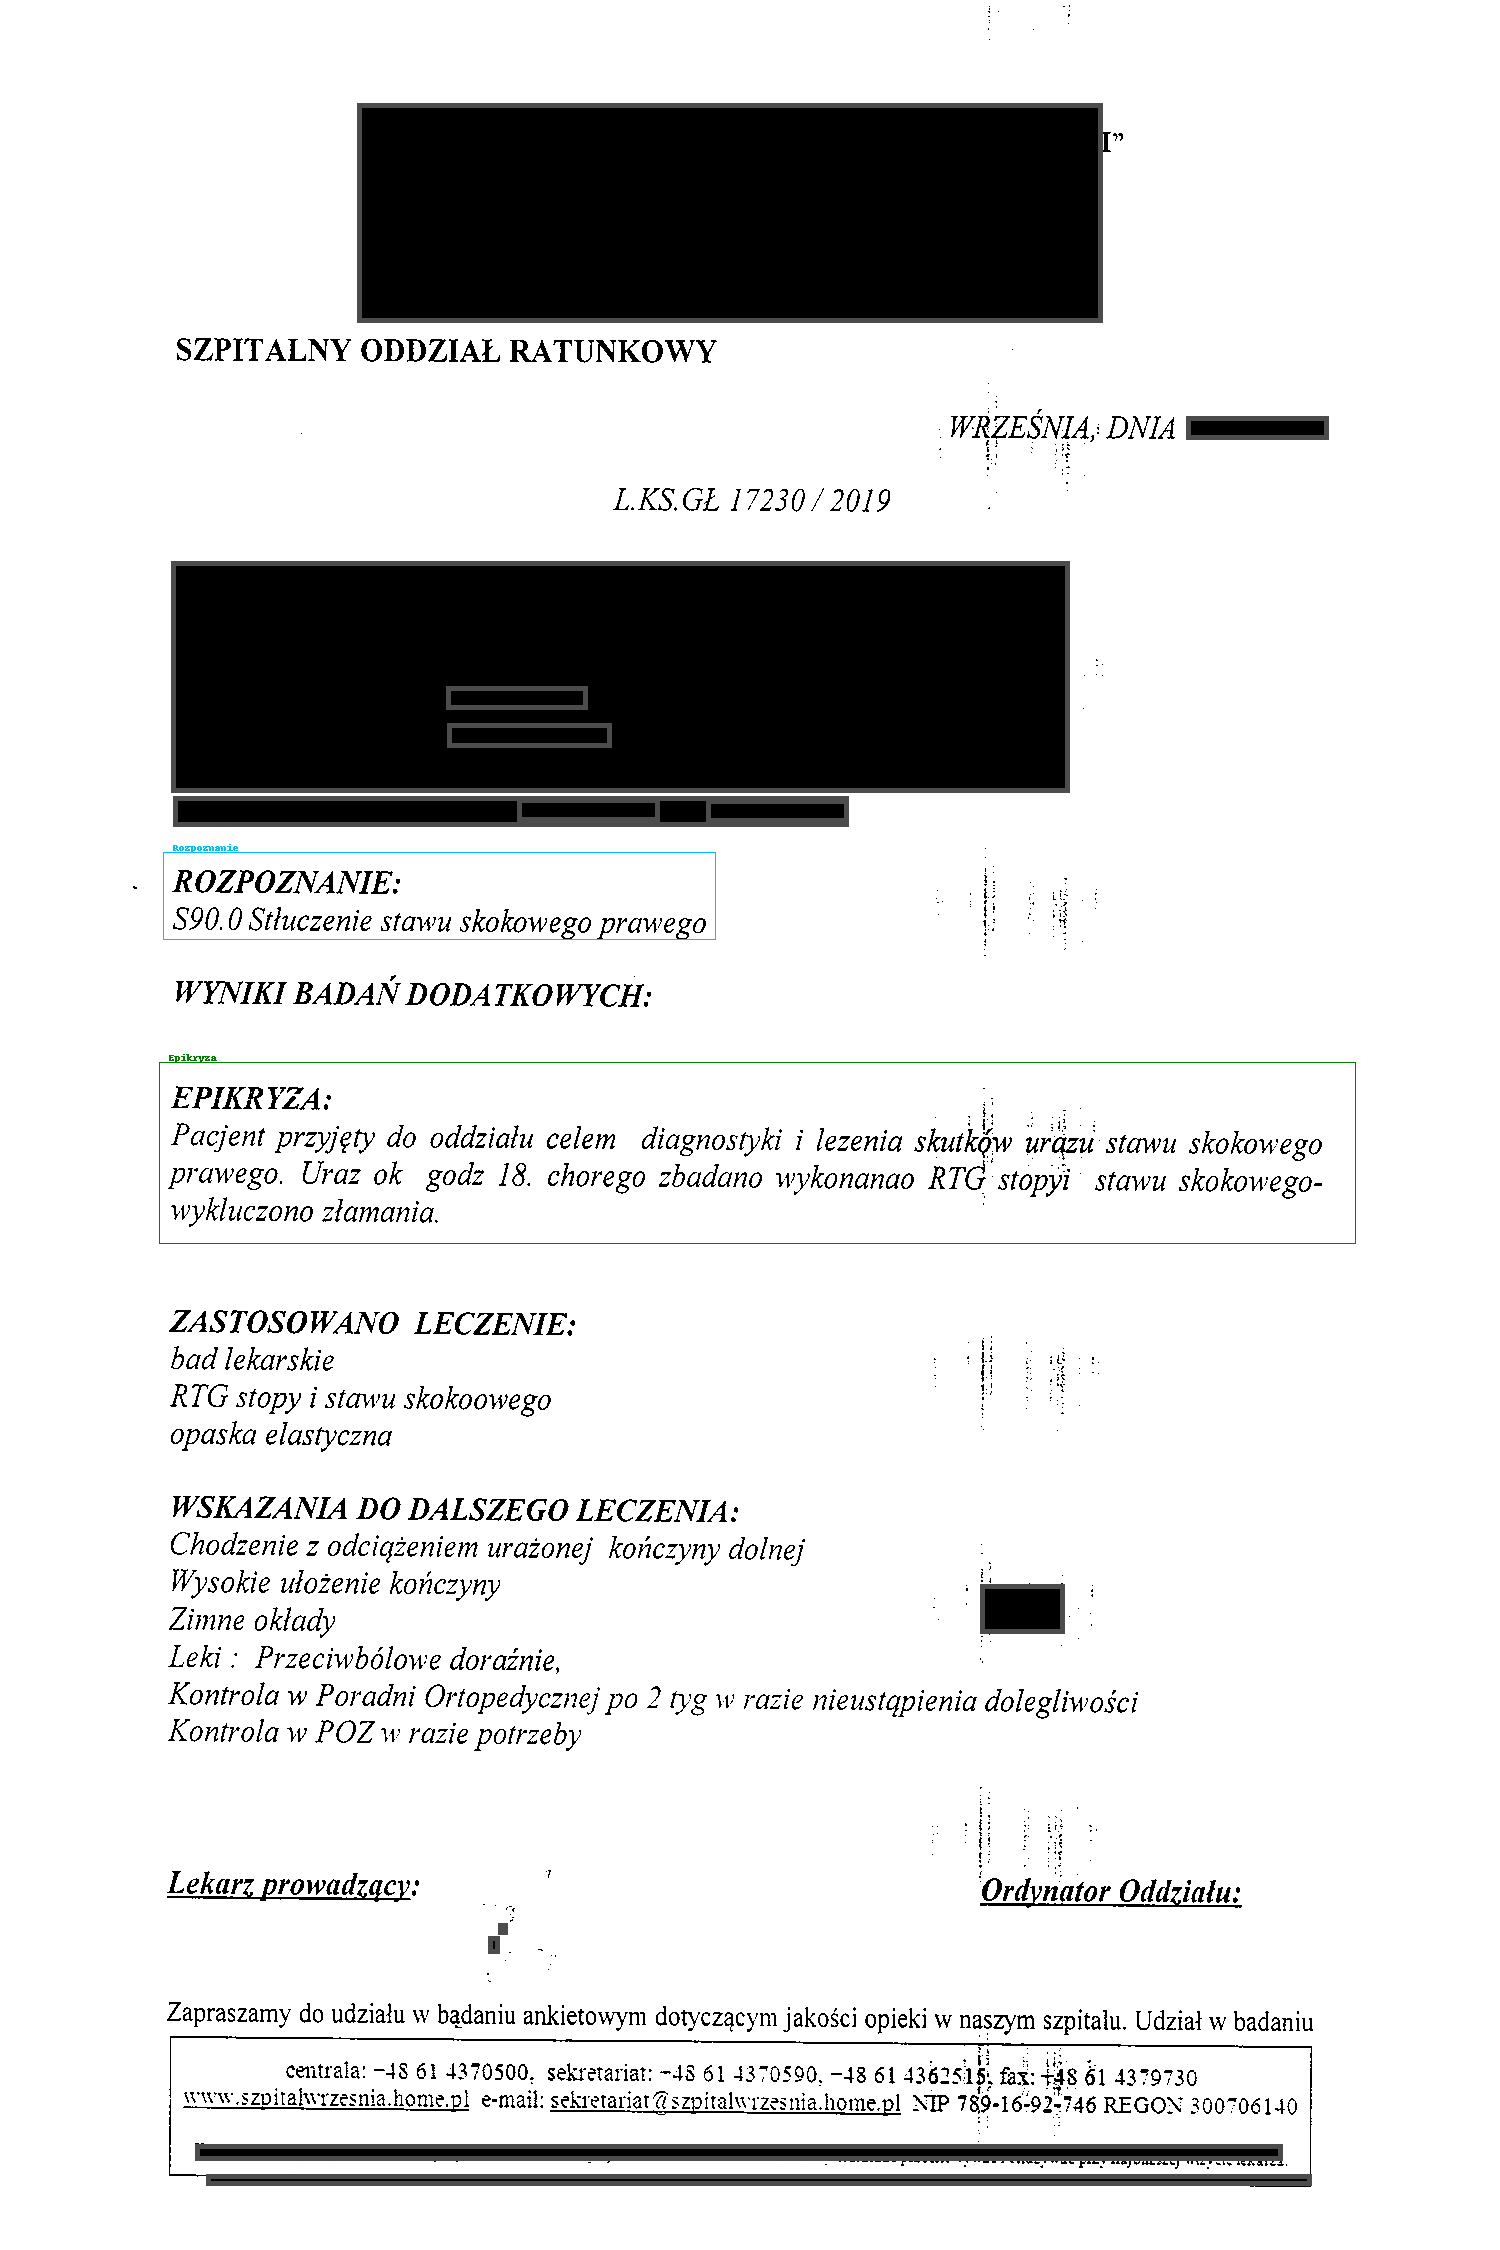

In [42]:
# Importing Image class from PIL module
from PIL import Image
from PIL import ImageDraw, ImageFont

file_name = "355343_medicalDocumentatnionFile_1__0_a"

labels_params = df[df["filename"]==file_name].label.values[0]
im = Image.open(f"data/images/03_6502_images_5_07_2022/Done A_343959-356655 v Py=27.09.2020_17.29 Th=0.22-20220705T102908Z-001/Done A_343959-356655 v Py=27.09.2020_17.29 Th=0.22/{file_name}.jpg")
im = im.convert("RGB")
draw = ImageDraw.Draw(im)
font = ImageFont.load_default()
# font = ImageFont.truetype("arial.ttf", size=44)


for label in labels_params:
    label_text, label_x, label_y, label_width, label_height = convert_from_ls(label)

    # Setting the points for cropped image
    left = label_x
    top = label_y
    right = label_x + label_width
    bottom = label_y + label_height

    draw.rectangle((left, top, right, bottom), outline=label2color[label_text])
    draw.text((left + 10, top - 10), text=label_text, fill=label2color[label_text], font=font)

    # Cropped image of above dimension
    # (It will not change original image)
    im_crop = im.crop((left, top, right, bottom))

    print(im_crop.size)
    display(im_crop)



print(im.size)
display(im)
